## Static evolution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numba import njit, prange
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import pickle

from IPython.display import HTML
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.manifold import MDS
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

plt.rcParams.update({"font.size": 16})

import helper

/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:61: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/Users/csengepetak/Documents/GitHub/CA_GRN2/helper.py:82: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [2]:
#Parameters
pop_size = 1000
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1

rule = 90
seed_int = 1024

pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)
targets, phenos, fitnesses = helper.get_pop_TPF(pop, pop_size, num_cells, grn_size, dev_steps, geneid, rule, seed_int)

#pickle.dump(phenos, open("random_phenos.p", "wb" ) )
#phenos = pickle.load(open("random_phenos.p", "rb"))

#### Final fitness

In [49]:
max_fits = pickle.load(open("static_max_fits_all256.p", "rb"))
#256 rules, 5 reps, 1000 generations
evolved_mean=np.mean(np.array(max_fits)[:,:,-1],axis=1) #average final fitness of 5 reps
evolved_std=np.std(np.array(max_fits)[:,:,-1],axis=1) #average final fitness of 5 reps

rules=list(range(0,256))
fits=[]
for rule in rules:
    targets, calc_phenos, calc_fitnesses = helper.get_pop_TPF(pop, pop_size, num_cells, grn_size, dev_steps, geneid, rule, seed_int)
    fits.append(calc_fitnesses)
rand_ave=np.mean(np.array(fits),axis=1)
rand_max=np.max(np.array(fits),axis=1)
rand_std=np.std(np.array(fits),axis=1)

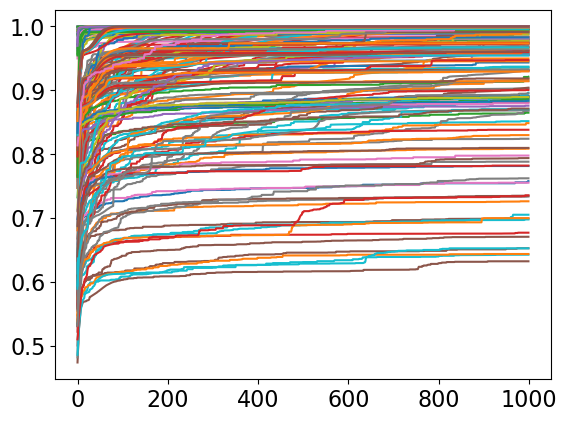

In [50]:
ave_max=np.mean(np.array(max_fits),axis=1)
plt.plot(ave_max.T)
plt.show()

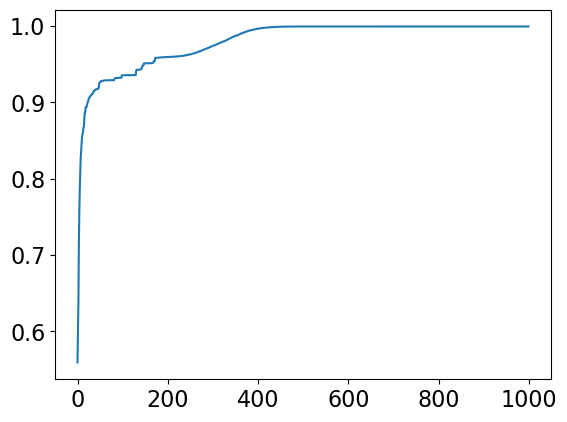

In [51]:
plt.plot(ave_max[83])

[0.11076771 0.24170627 0.27464259 0.24789031 0.06392489 0.33600929
 0.11813107 0.09228399 0.08292295 0.02450507]


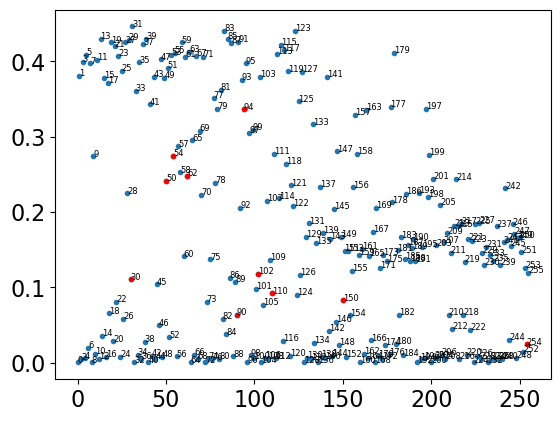

In [52]:
deltas = ave_max[:,-1] - ave_max[:,0]
#deltas.shape
plt.plot(list(range(256)),deltas, ".")

rules=[30,50,54,62,90,94,102,110,150,254]
plt.plot(rules,deltas[rules], ".", color="red")

for i,(x,y) in enumerate(zip(list(range(256)),deltas)):
    S = 20
    plt.text(x ,y ,f"{i}", fontsize=6)

print(deltas[rules])

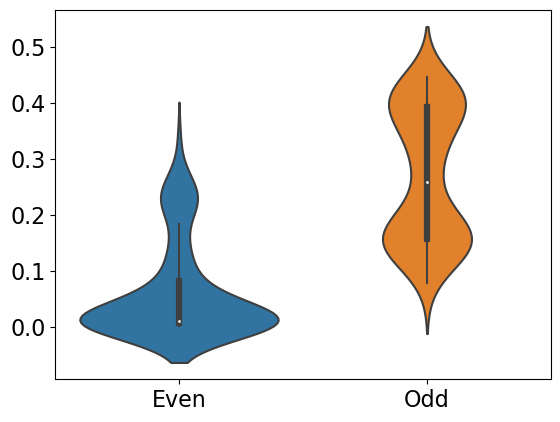

In [53]:
evenrules=deltas[np.arange(0,256,2)]
oddrules=deltas[np.arange(1,256,2)]

sns.violinplot([evenrules,oddrules])
plt.xticks([0, 1], ['Even', 'Odd'])
plt.show()

In [54]:
highdelta=np.where(deltas > 0.33)[0]
highdelta[np.where(highdelta % 2 == 0)] # 94 is the only even rule

array([94])

In [55]:
meddelta=np.where((deltas > deltas[102]) & (deltas < deltas[50]))[0]
print(meddelta)
meddelta[np.where(meddelta % 2 == 0)]

[ 28  60  70  75  78  92 107 109 114 121 122 129 131 135 137 139 143 145
 149 151 153 155 156 159 161 165 167 169 171 173 175 178 181 183 185 186
 187 188 189 190 191 193 195 198 203 205 207 209 211 213 215 217 219 221
 223 225 227 229 230 231 233 235 237 239 241 242 243 245 246 247 249 250
 251 253 255]


array([ 28,  60,  70,  78,  92, 114, 122, 156, 178, 186, 188, 190, 198,
       230, 242, 246, 250])

In [56]:
sortedlist=meddelta[np.argsort(deltas[meddelta])]
newrules=sortedlist[np.where(sortedlist % 2 == 0)] #sorted by delta value, in the range we were missing, only even
newrules

array([230, 188,  60, 190, 250, 246,  92, 122, 178, 114, 198,  70, 186,
        28, 242, 156,  78])

/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 0.4460581680501494)

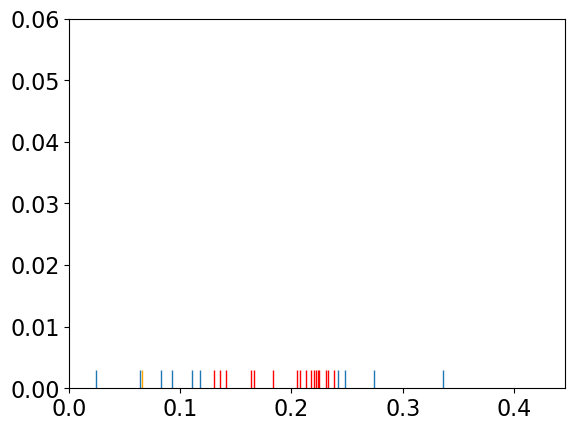

In [57]:
sns.rugplot(deltas[rules],height=0.05)
sns.rugplot(deltas[newrules],height=0.05, color="red")
sns.rugplot([deltas[18]],height=0.05, color="orange")
plt.ylim(0,0.06)
plt.xlim(0, max(deltas))

In [65]:
newrules = [22, 126, 146, 154, 82, 86, 18, 118, 122, 70]

In [85]:
#10 gens in, 100 gens in, 290 gens in
#33 switches
gensin=[10,100,290]
swichesin=[3,10,15,25,33]
l=[s*300+g for s in swichesin for g in gensin]
print(l)

#sbatch launcher two 22 22 69904 149796

[910, 1000, 1190, 3010, 3100, 3290, 4510, 4600, 4790, 7510, 7600, 7790, 9910, 10000, 10190]


In [86]:
for i in range(20000):
    if i in l:
        print(i)

910
1000
1190
3010
3100
3290
4510
4600
4790
7510
7600
7790
9910
10000
10190


In [76]:
num_generations = 10_000
save_freq=int(num_generations/5)
save_freq

2000

[0.75777899 1.         0.96311886 0.98020177 0.89097967 0.99502101
 0.92121491 0.88385652 0.7814705  1.        ]


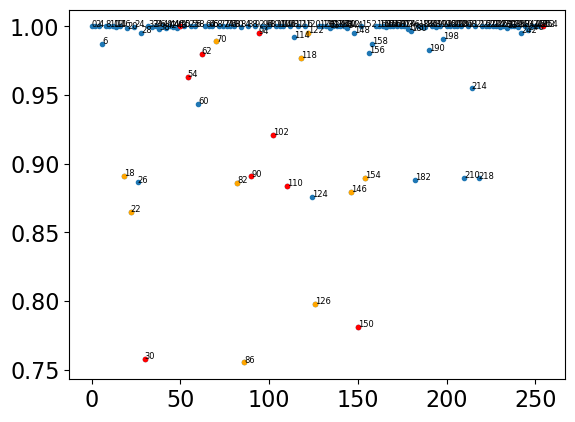

In [75]:
deltas = ave_max[:,-1]
#deltas.shape
evens=np.arange(0,256,2) #plotting only even rules - those are the valid ones anyways
plt.plot(evens,deltas[evens], ".")

rules=[30,50,54,62,90,94,102,110,150,254]
plt.plot(rules,deltas[rules], ".", color="red")
plt.plot(newrules,deltas[newrules], ".", color="orange")

for i,(x,y) in enumerate(zip(evens,deltas[evens])):
    S = 20
    plt.text(x ,y ,f"{x}", fontsize=6)

print(deltas[rules])

In [60]:
stuck=np.where(deltas < deltas[110])[0]
stuck[np.where(stuck % 2 == 0)] #86 is very similar to 30 pattern wise...

array([ 22,  30,  86, 124, 126, 146, 150])

/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.6322690801355451, 1.0)

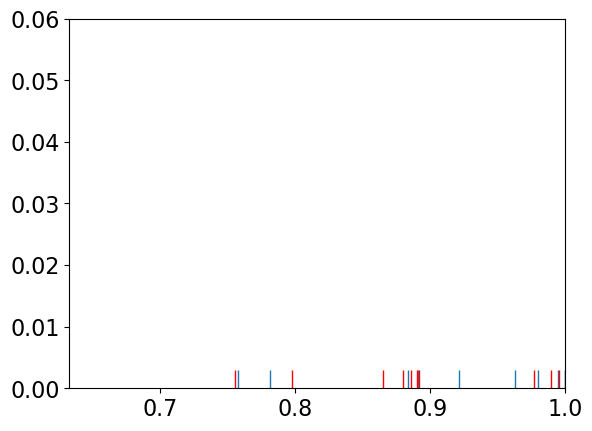

In [66]:
sns.rugplot(deltas[rules],height=0.05)
sns.rugplot(deltas[newrules],height=0.05, color="red")
plt.ylim(0,0.06)
plt.xlim(min(deltas), max(deltas))

/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/csengepetak/miniconda3/envs/grnenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


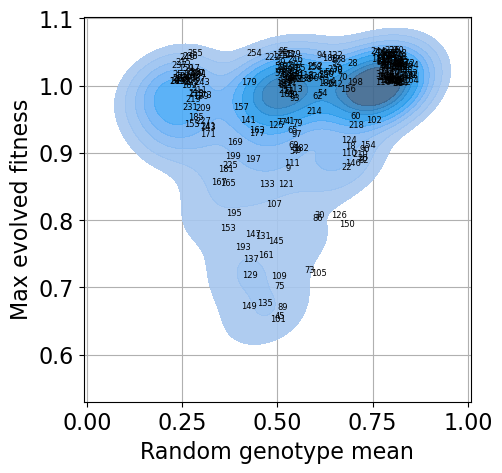

In [6]:
plt.figure(figsize=(5,5))
#plt.scatter(rand_ave,evolved_mean)
sns.kdeplot(x=rand_ave,y=evolved_mean, fill=True, zorder=3, alpha=0.9)
for i,(x,y) in enumerate(zip(rand_ave,evolved_mean)):
    S = 20
    plt.text(x + np.random.rand()/S,y + np.random.rand()/S,f"{i}", fontsize=6)
plt.grid(zorder=0)
plt.ylabel("Max evolved fitness")
plt.xlabel("Random genotype mean")
#slope, intercept = np.polyfit(evolved, rand_ave, 1)
#plt.plot(evolved, slope*evolved + intercept, color='red', label='Line of Best Fit')
plt.show()

Text(0, 0.5, 'Std of max fits between replicates')

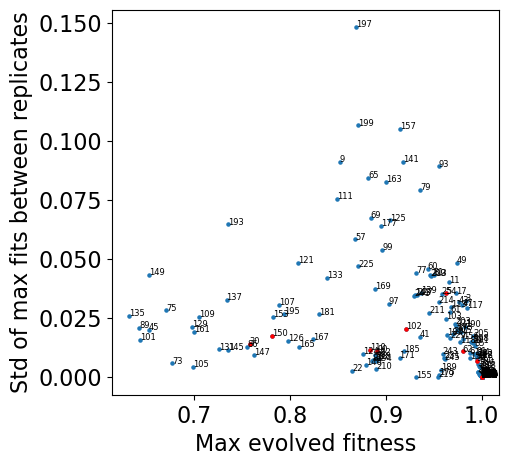

In [115]:
plt.figure(figsize=(5,5))
plt.scatter(evolved_mean,evolved_std, s=5)

rules=[30,50,54,62,90,94,102,110,150,254]
plt.scatter(evolved_mean[rules],evolved_std[rules], color="red", s=5)

for i,(x,y) in enumerate(zip(evolved_mean,evolved_std)):
    S = 20
    plt.text(x ,y ,f"{i}", fontsize=6)


plt.xlabel("Max evolved fitness")
plt.ylabel("Std of max fits between replicates")

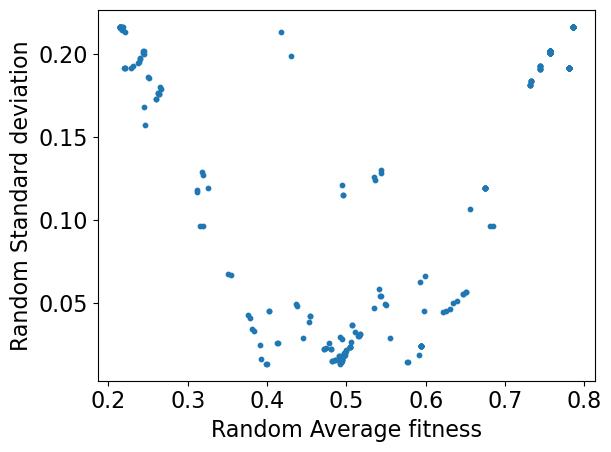

In [8]:
plt.scatter(rand_ave,rand_std,s=10)
plt.xlabel("Random Average fitness")
plt.ylabel("Random Standard deviation")
#plt.xlim(0,1)
plt.tight_layout()

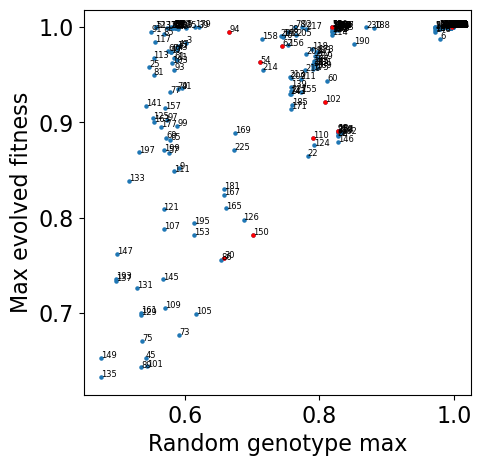

In [117]:
plt.figure(figsize=(5,5))
plt.scatter(rand_max,evolved_mean, s=5)
plt.ylabel("Max evolved fitness")
plt.xlabel("Random genotype max")

rules=[30,50,54,62,90,94,102,110,150,254]
plt.scatter(rand_max[rules],evolved_mean[rules], color="red", s=5)

for i,(x,y) in enumerate(zip(rand_max,evolved_mean)):
    S = 20
    plt.text(x ,y ,f"{i}", fontsize=6)

slope, intercept = np.polyfit(evolved_mean, rand_max, 1)
#plt.plot(evolved, slope*evolved + intercept, color='red', label='Line of Best Fit')
plt.show()

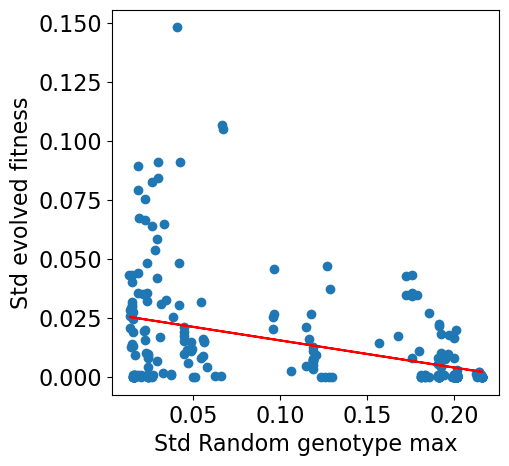

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(rand_std,evolved_std)
plt.ylabel("Std evolved fitness")
plt.xlabel("Std Random genotype max")

slope, intercept = np.polyfit(rand_std, evolved_std, 1)
plt.plot(rand_std, slope*rand_std + intercept, color='red', label='Line of Best Fit')
plt.show()

### Temporal behaviour

/var/folders/41/13rhly317ygcfk0c_1jggxch0000gn/T/ipykernel_51420/1405594078.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(new_labels)


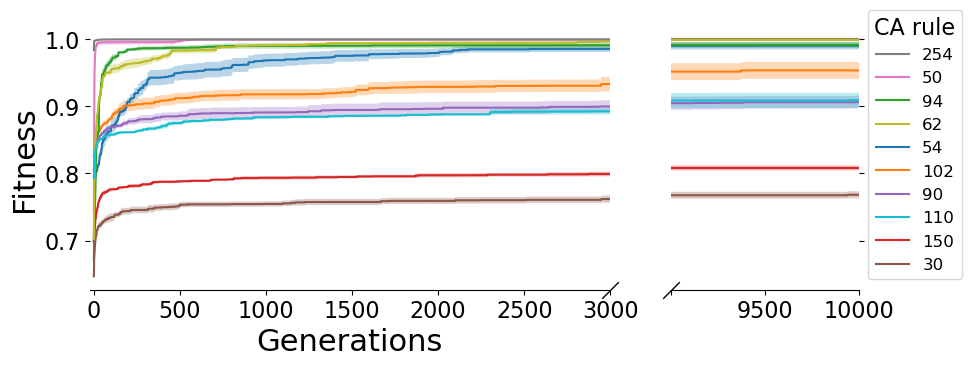

In [21]:
max_fits = pickle.load(open("static_max_fits.p", "rb"))
#max_fits = pickle.load(open("static_ave_fits.p", "rb"))
#max_fits = pickle.load(open("static_kidstds.p", "rb"))



rules=[54,102,94,150,90,30,50,254,62,110]
rule_order=[254,50,94,62,54,102,90,110,150,30]
order=[]
for i in rule_order:
    j=np.where(np.array(rules) == i)[0][0]
    order.append(j)

fig = plt.figure(figsize=(10, 4))
# fig = plt.figure(layout="constrained")
gs = GridSpec(1, 10, figure=fig)
ax1 = fig.add_subplot(gs[0, :7])
ax2 = fig.add_subplot(gs[0, 7:])

for idx, data in enumerate(max_fits):
    # Calculate mean and standard error for each list
    mean1 = np.mean(data, axis=0)
    stderr1 = np.std(data, axis=0) / np.sqrt(len(data))

    ax1.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
    ax2.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)

    # plot the same data on both axes
    ax1.plot(mean1, "-", color=f"C{idx}", label=rules[idx])
    ax2.plot(mean1, "-", color=f"C{idx}", label=rules[idx])


# Get handles and labels from the current axes
handles, labels = plt.gca().get_legend_handles_labels()

# Reorder handles and labels
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

ax1.set_xlim(-25, 3_000)
ax2.set_xlim(9_000, 10_000)
#ax1.set_ylim(0.6, 1.01)
#ax2.set_ylim(0.6, 1.01)

ax1.yaxis.tick_left()
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.left.set_visible(False)

ax2.yaxis.tick_right()
ax2.spines.left.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.set_yticklabels([])

# hide the first xtick of ax2, it's too close to the last of ax1
new_labels = [ticklabel.get_text() for ticklabel in ax2.get_xticklabels()]
new_labels[0] = ""
ax2.set_xticklabels(new_labels)

# Add labels and legend
ax1.set_xlabel("Generations",fontsize=22)
ax1.set_ylabel("Fitness",fontsize=22)

# ax1.legend(title="CA rule", fontsize=10)
#ax2.legend(title="CA rule", fontsize=12, loc="lower center")
plt.rcParams['legend.title_fontsize'] = 16
ax2.legend(handles, labels,title="CA rule",fontsize=12, bbox_to_anchor=(1, 1.1))

d = 1.0  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)],
    markersize=12,
    linestyle="none",
    color="k",
    mec="k",
    mew=1,
    clip_on=False,
)
ax1.plot([1], [0], transform=ax1.transAxes, **kwargs)
ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)

plt.tight_layout()
#plt.savefig("figs/max_fits_10rules.pdf")
plt.show()

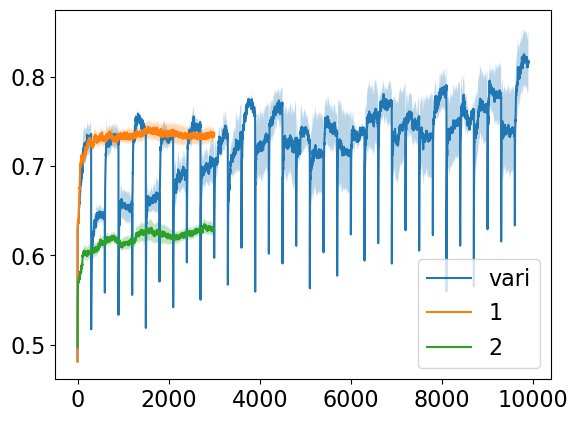

In [30]:
#TESTING RUN
allfits=[]
rule = 118
sl=600
seedint=69904

for i in range(5):
    f=np.loadtxt(f'results_new_rules/stats_300_{rule}-{rule}_69904-149796_{i+1}_avefits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="vari")

cfits=[]
for i in range(5):
    f=np.loadtxt(f'results_new_rules_one/stats_{sl}_{rule}_{seedint}_{i+1}_avefits.txt')
    cfits.append(f)

data=np.array(cfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="1")

seedint=149796
cfits=[]
for i in range(5):
    f=np.loadtxt(f'results_new_rules_one/stats_{sl}_{rule}_{seedint}_{i+1}_avefits.txt')
    cfits.append(f)

data=np.array(cfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="2")
plt.legend()
#plt.ylim(0.7,1)

In [35]:
#2*9899
33*300-1

9899

In [4]:
id=1
rule=22
f=np.loadtxt(f"results_new_rules/stats_300_{rule}-{rule}_69904-149796_{id}" + "_best_grn.txt")
num_generations=int(f.shape[0]/(grn_size+2)/grn_size)
print(num_generations)
f=f.reshape(num_generations,grn_size+2,grn_size)
print(f.shape)
pop=f[:,:,:]
seed_int=69904#149796###
t, p, f = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, rule, seed_int)
print(p.shape)
print(f)

12
(12, 24, 22)
(12, 23, 22)
[0.76066802 0.7566085  0.75103249 0.81162797 0.8449057  0.85076554
 0.70247693 0.69421415 0.73760268 0.75       0.74027277 0.72727273]


In [5]:
pop=pop[0,:,:]
print(pop.shape)

(24, 22)


In [6]:
with open("testing_loading_best_grn.txt", 'a') as f:
    np.savetxt(f, pop, newline=" ")

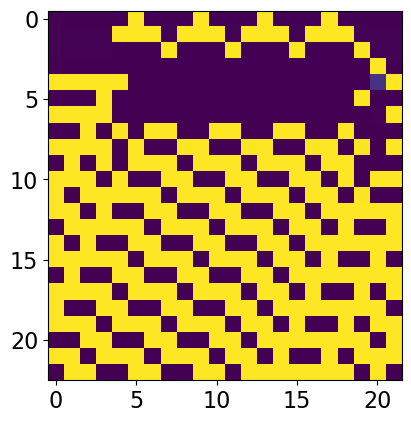

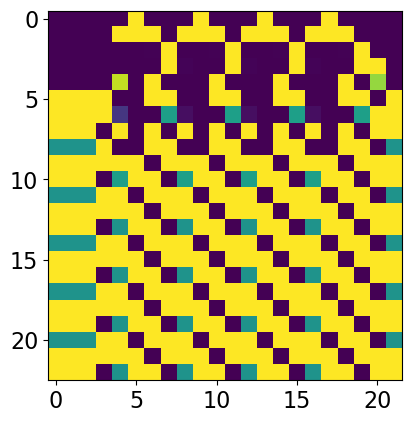

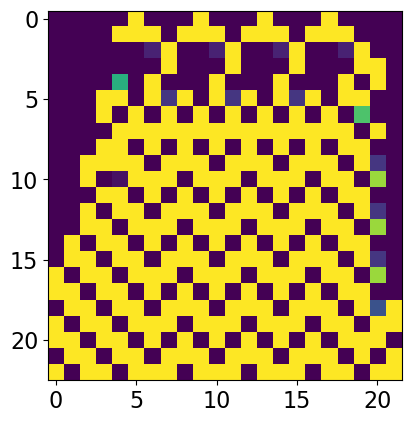

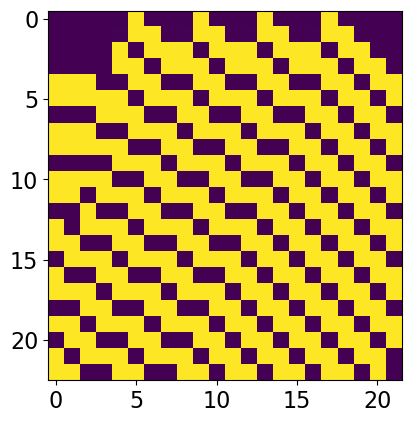

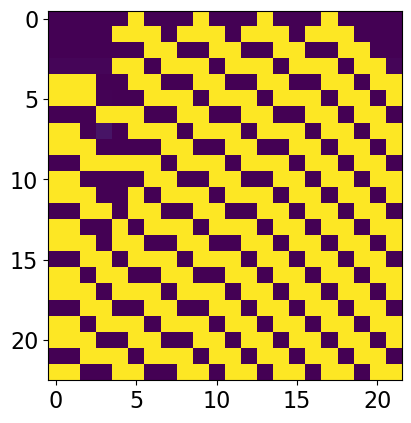

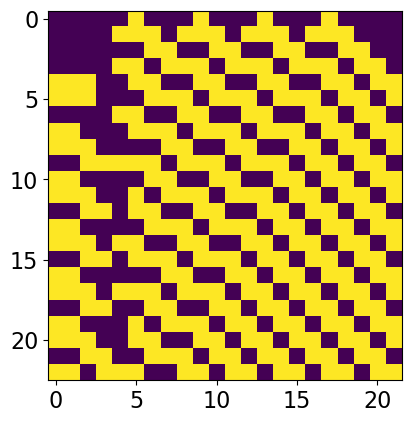

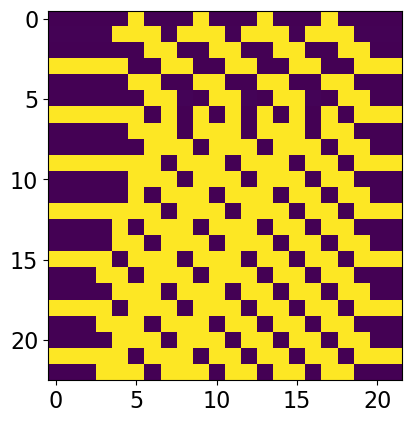

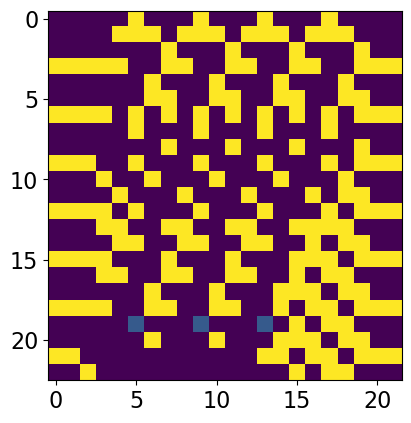

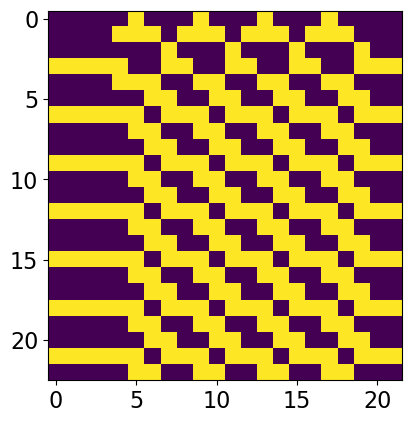

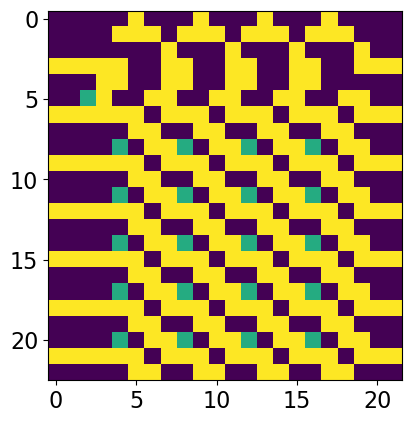

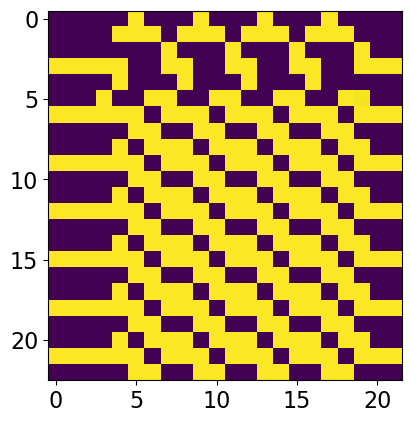

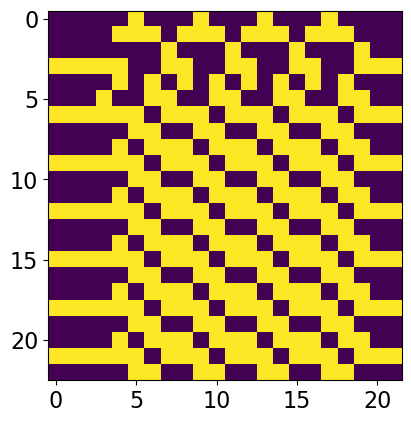

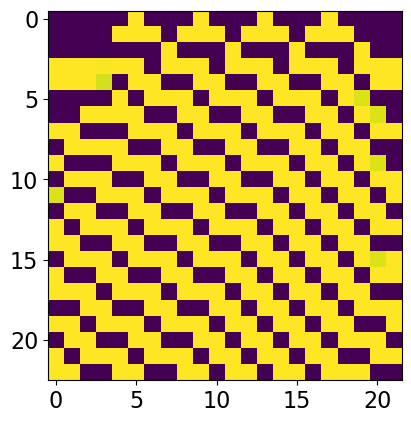

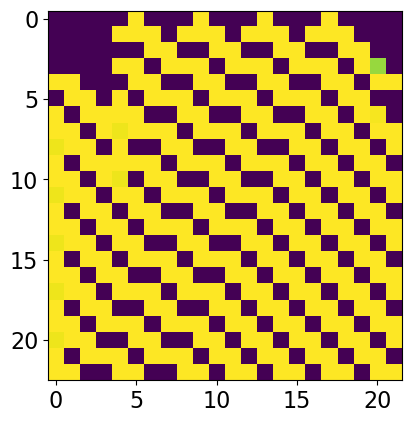

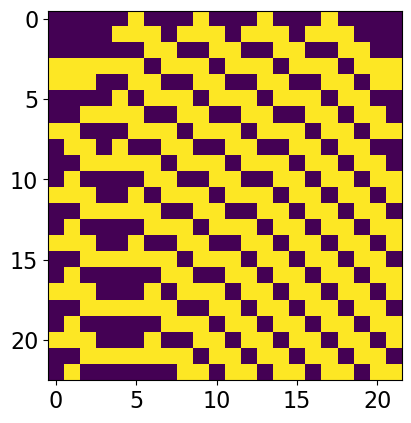

In [34]:
for i in p:
    plt.imshow(i)
    plt.show()

In [35]:
fname=f"results_new_rules/stats_300_{rule}-{rule}_69904-149796" + "_" + str(1)
f=np.loadtxt(fname + "_both_fits.txt")
print(f.shape[0]/2/pop_size)
num_generations=int(f.shape[0]/2/pop_size)
f=f.reshape(num_generations,2,pop_size)
f.shape

15.0


(15, 2, 1000)

In [42]:
gensin=[10,100,290]
swichesin=[3,10,15,25,32]
saveat=[s*300+g for s in swichesin for g in gensin]
print(saveat)
print(len(saveat))

[910, 1000, 1190, 3010, 3100, 3290, 4510, 4600, 4790, 7510, 7600, 7790, 9610, 9700, 9890]
15


In [43]:
season_len=300
curr=0
for gen in range(20_000):
    if gen in saveat:
       print(gen, curr)
      
    if gen % season_len == season_len - 1: # flip target
      curr = (curr + 1) % 2

910 1
1000 1
1190 1
3010 0
3100 0
3290 0
4510 1
4600 1
4790 1
7510 1
7600 1
7790 1
9610 0
9700 0
9890 0


0.490990351826032
0.6439745614103719
910


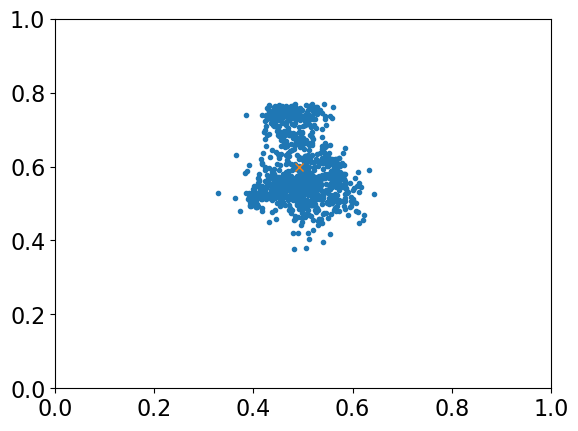

0.48532441545316324
0.6758556315048978
1000


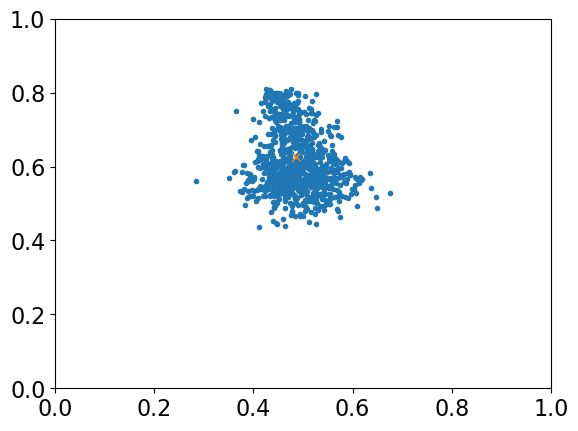

0.48562746248715566
0.6617307787898974
1190


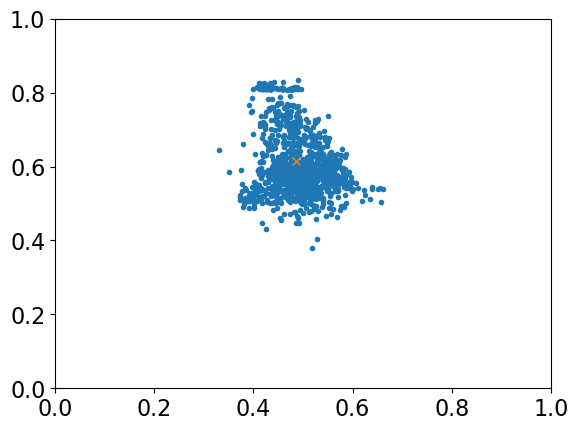

0.6816659140333827
0.8904567293900881
3010


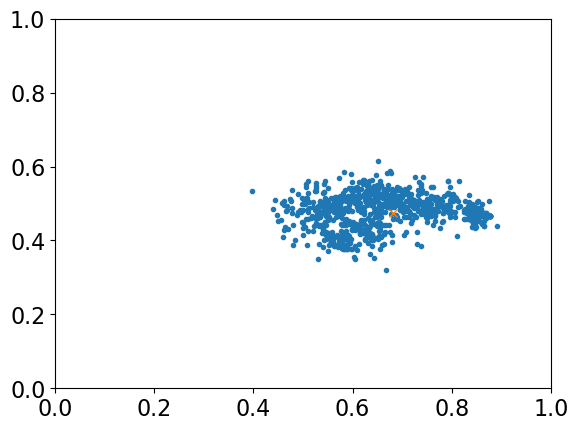

0.7373955299506831
0.9439754264804382
3100


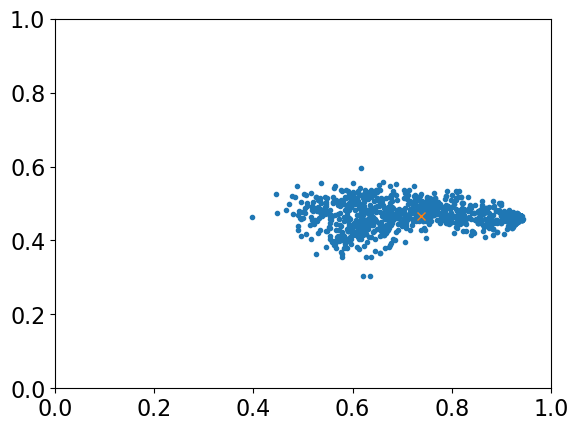

0.7290563648974573
0.9482793969891528
3290


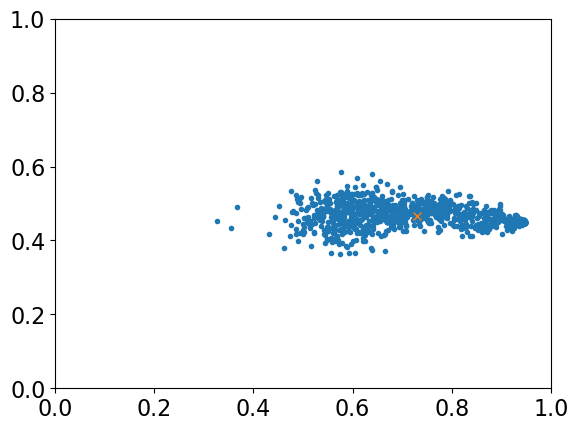

0.4375181849554874
0.5980919903022619
4510


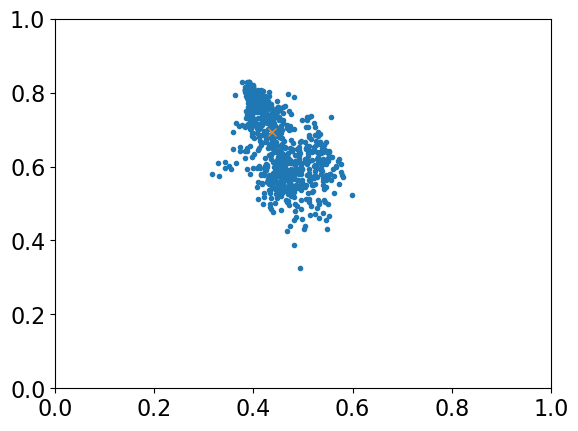

0.42550155833420034
0.5695231012188293
4600


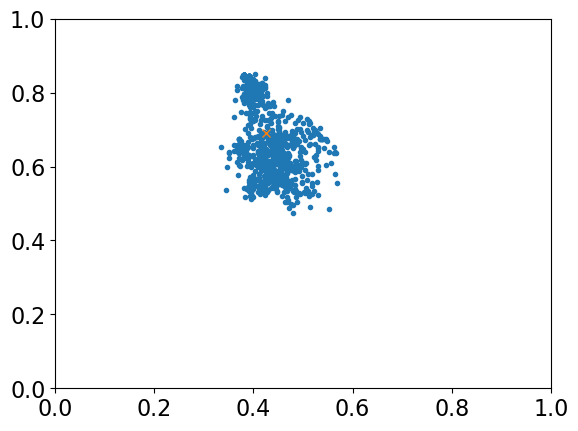

0.45313484576225516
0.6053087756692527
4790


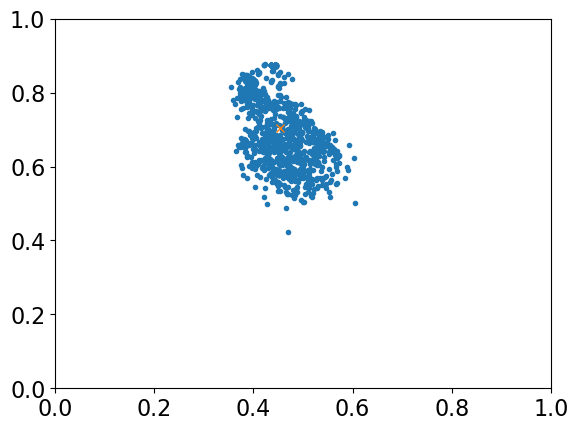

0.47153651009866077
0.647813026019579
7510


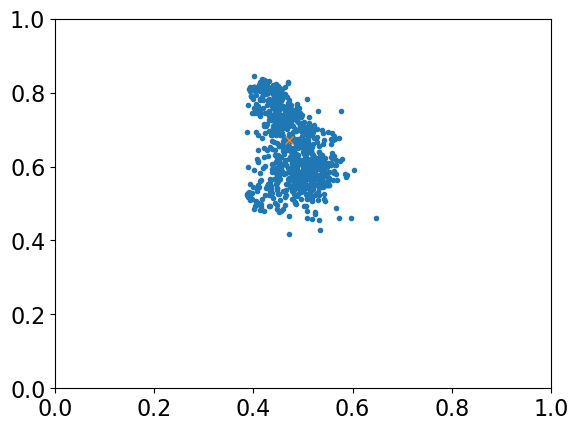

0.46730532043936923
0.593443858588993
7600


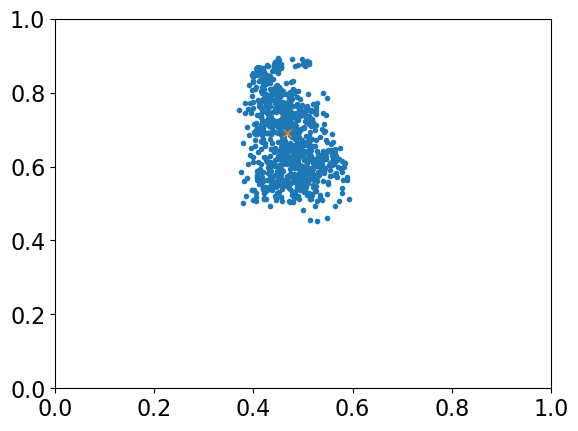

0.4649207917630133
0.6013375226713773
7790


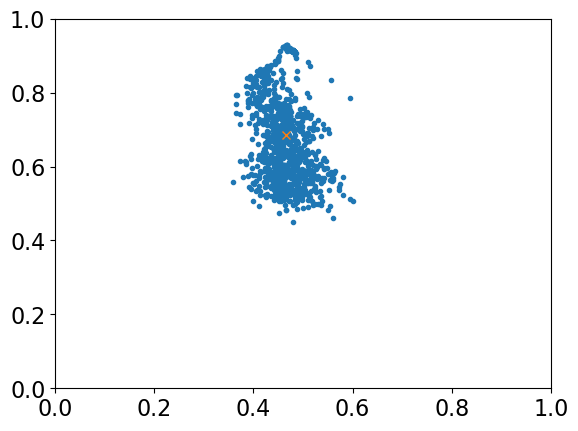

0.6861663180524913
0.8611431084676198
9610


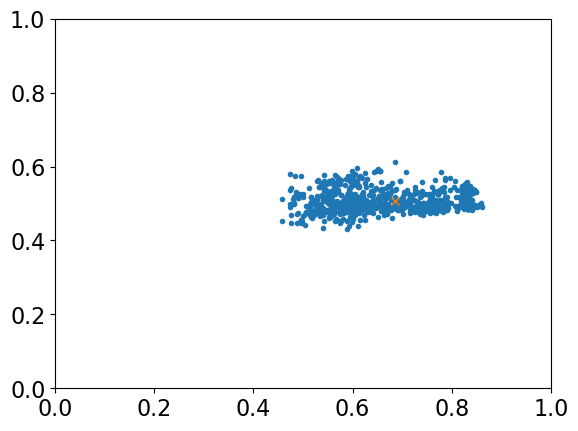

0.7534734641865062
0.9230479570240296
9700


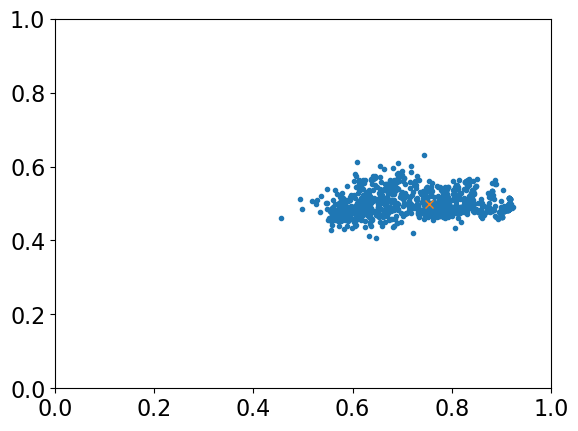

0.7270867918877775
0.9524689934718877
9890


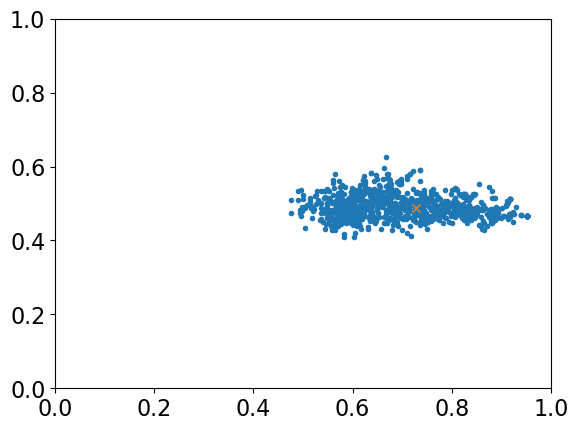

In [44]:

for x,i in enumerate(f):
    plt.plot(i[0,:],i[1,:],".")
    xmean=np.mean(i[0,:])
    ymean=np.mean(i[1,:])
    plt.plot(xmean, ymean, "x")
    print(xmean)
    print(np.max(i[0,:]))
    print(saveat[x])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

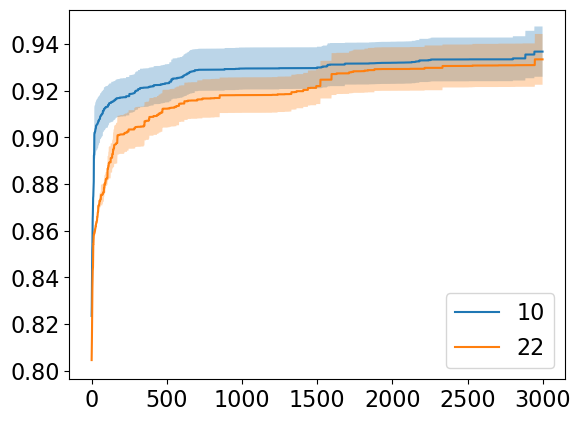

In [25]:
# 10 grn_size?
allfits=[]
for i in range(5):
    f=np.loadtxt(f'stats_300_102_1024_{i+1}_maxfits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="10")

data=np.array(max_fits[1])[:,:3000]
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="22")

allfits=[]
for i in range(5):
    f=np.loadtxt(f'500pop/stats_300_102_1024_{i+1}_maxfits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
#plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
#plt.plot(mean1, "-", label="10, 500 pop")

plt.legend()


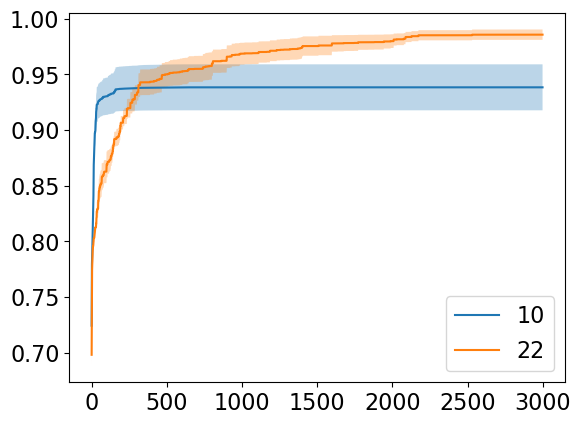

In [24]:
# 10 grn_size?
allfits=[]
for i in range(5):
    f=np.loadtxt(f'stats_300_54_1024_{i+1}_maxfits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="10")

data=np.array(max_fits[0])[:,:3000]
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
plt.plot(mean1, "-", label="22")

allfits=[]
for i in range(5):
    f=np.loadtxt(f'500pop/stats_300_54_1024_{i+1}_maxfits.txt')
    allfits.append(f)

data=np.array(allfits)
mean1 = np.mean(data, axis=0)
stderr1 = np.std(data, axis=0) / np.sqrt(len(data))
#plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, alpha=0.3)
#plt.plot(mean1, "-", label="10, 500 pop")

plt.legend()


### Evolved GRNs
Networks, generalisability for rule

In [28]:
#GET GRNS for rule 94
rule=102
grn_size = 10
generation=2999
num_cells=22
dev_steps=22
geneid=1
grns=[]
for i in range(5):
    #fname="final_results_all/stats_one_hot_seeded_0_100000_" + str(rule) + "_" + str(0) + "_" + str(i+1)
    fname="final_results_all/stats_300_" + str(rule) + "_" + str(1024) + "_" + str(i+1)
    #fname="final_results_all/ori_" + str(rule) + "_" + str(i+1)
    #f=np.loadtxt(fname + ".txt")#_best_grn.txt")
    f=np.loadtxt(fname + "_best_grn.txt")
    num_generations=int(f.shape[0]/(grn_size+2)/grn_size)
    f=f.reshape(num_generations,grn_size+2,grn_size)
    grn=f[generation,:,:] #last generation
    grns.append(grn)

In [29]:
pop=np.array(grns)
targets=[]
phenos=[]
fits = []
seedints = [1024,69904,149796,4147842,1238860,2481300]
for seed_int in seedints:
    t, p, f = helper.get_pop_TPF(pop, 5, num_cells, grn_size, dev_steps, geneid, rule, seed_int)
    targets.append(t)
    phenos.append(p)
    fits.append(f)

targets=np.array(targets)
phenos=np.array(phenos)
fits=np.array(fits)

In [30]:
fits

array([[0.94628094, 0.94628099, 0.93295479, 0.89305179, 0.9648753 ],
       [0.69421484, 0.70908385, 0.648519  , 0.66706941, 0.68757514],
       [0.55371899, 0.60539089, 0.5494713 , 0.59278812, 0.57823972],
       [0.57024792, 0.49544486, 0.54627998, 0.55140606, 0.52641058],
       [0.51446279, 0.51422106, 0.53533234, 0.51266167, 0.5154113 ],
       [0.51859503, 0.54338843, 0.47506109, 0.52683748, 0.5249837 ]])

In [31]:
df = pd.DataFrame(fits.T, columns=["1 seed","4 seed", "6 seed", "random 1", "random 2", "random 3"])
df

,1 seed,4 seed,6 seed,random 1,random 2,random 3
0,0.946281,0.694215,0.553719,0.570248,0.514463,0.518595
1,0.946281,0.709084,0.605391,0.495445,0.514221,0.543388
2,0.932955,0.648519,0.549471,0.546280,0.535332,0.475061
3,0.893052,0.667069,0.592788,0.551406,0.512662,0.526837
4,0.964875,0.687575,0.578240,0.526411,0.515411,0.524984


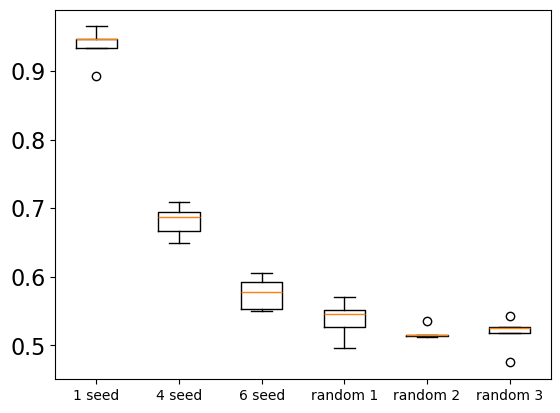

In [32]:
plt.boxplot([df[column] for column in df.columns], labels=df.columns)
plt.xticks(fontsize=10)
plt.show()


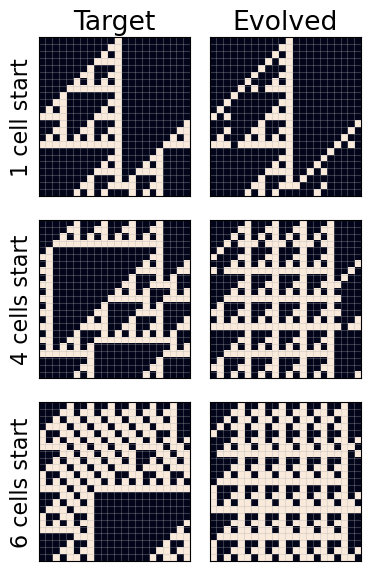

In [33]:
nrows = 3
ncols = 2
scale=2

id=0 #replicate id to plot, 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * scale, nrows*scale), sharex=True, sharey=True)
axs = axs.flatten()

counter=0
for i, ax in enumerate(axs):
    if i % 2 == 0:
        helper.imshow_ca(targets[counter],ax=ax)
    else:
        helper.imshow_ca(phenos[counter,id,:,:],ax=ax)
        counter+=1
    #ax.set_title(f"Rule: {rules[i]}", fontsize=16)

for ax, col in zip(axs, ["Target","Evolved"]):
    ax.set_title(col)

axs[0].set_ylabel("1 cell start")
axs[2].set_ylabel("4 cells start")
axs[4].set_ylabel("6 cells start")

plt.tight_layout()
#plt.savefig("figs/94_general.png")

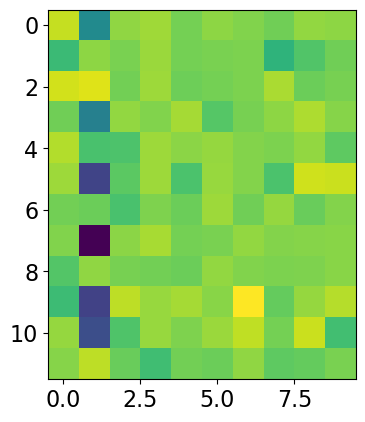

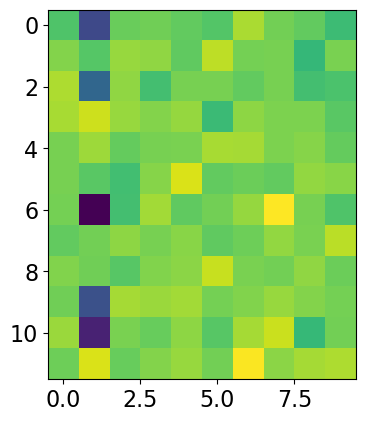

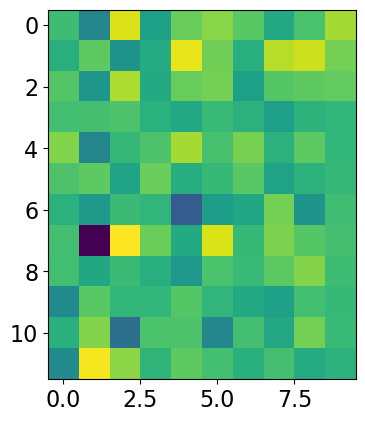

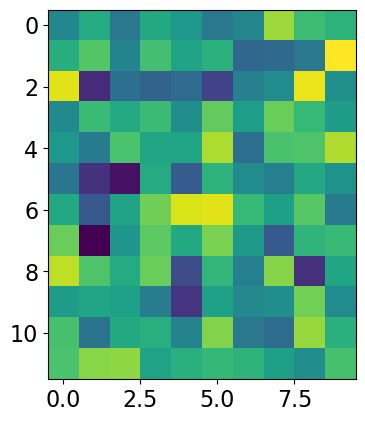

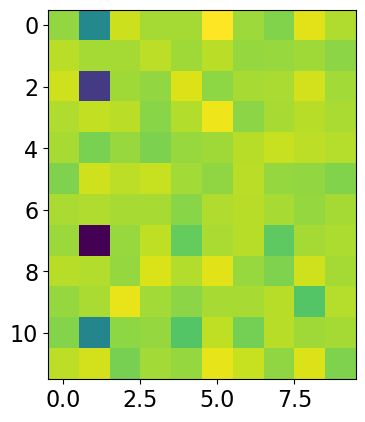

In [34]:
for p in pop:
    plt.imshow(p)
    plt.show()

### Illustrative

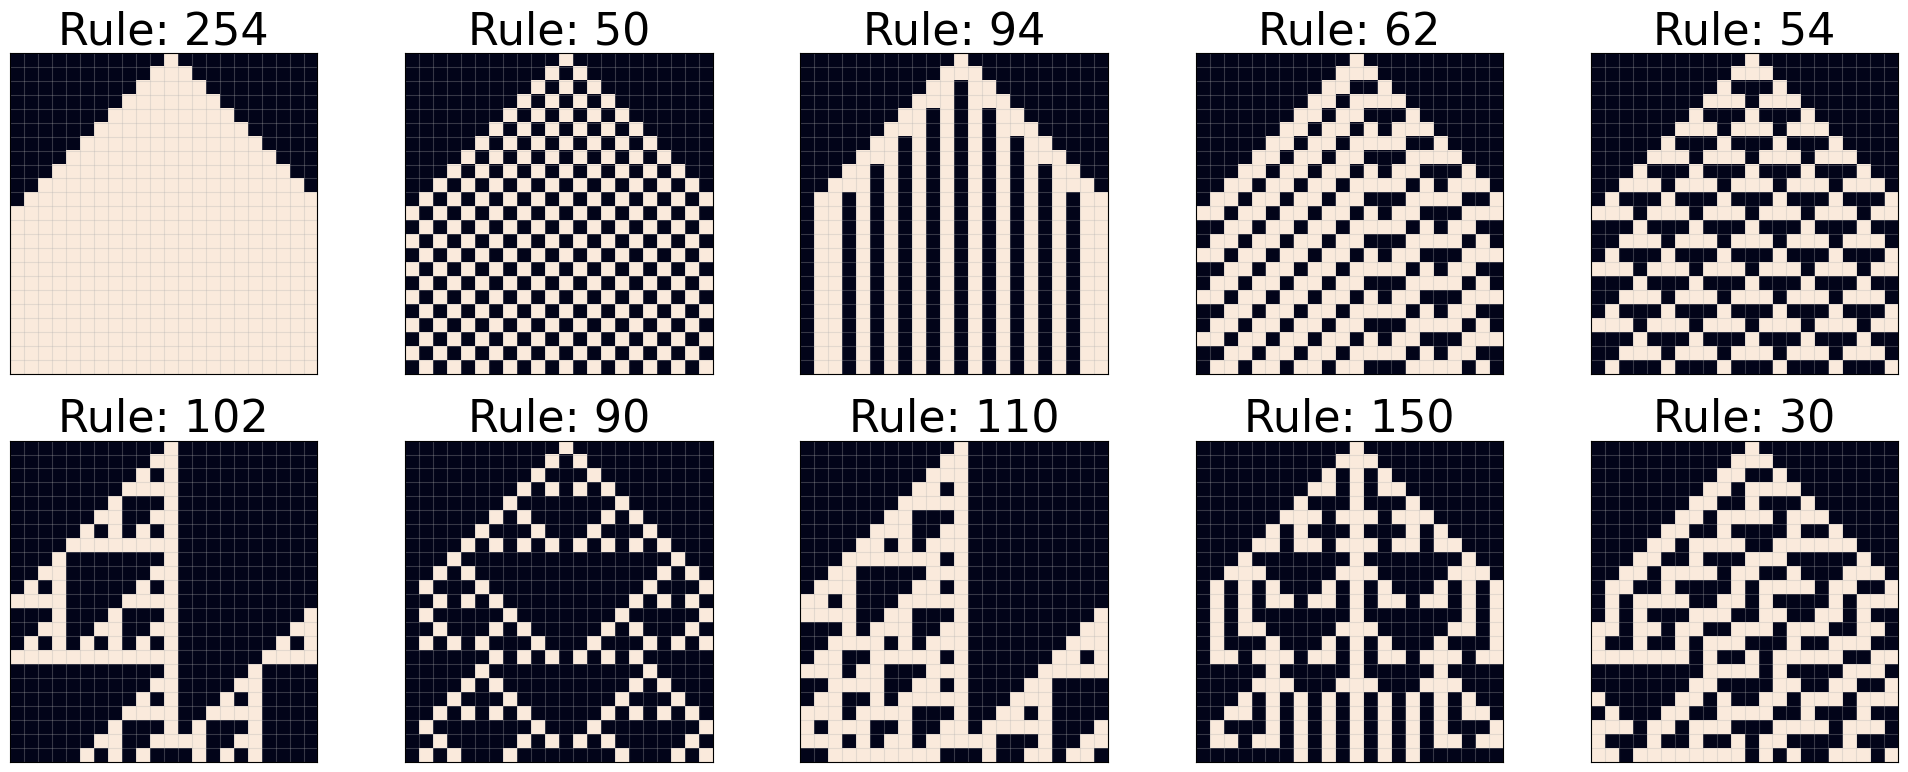

In [16]:
rule_order=[254,50,94,62,54,102,90,110,150,30]
seedint = 1024
targets=[]
for r in rule_order:
    start_pattern = helper.seedID2string(seedint, num_cells)
    targets.append(helper.rule2targets_wrapped_wstart(int(r), L=dev_steps+1, N=num_cells, start_pattern=start_pattern))

nrows = 2
ncols = 5
scale=4

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * scale, nrows*scale), sharex=True, sharey=True)
axs = axs.flatten()

for i, ax in enumerate(axs):
    ca = targets[i]
    rule = rule_order[i]
    helper.imshow_ca(ca,ax=ax)
    ax.set_title(f"Rule: {rule}", fontsize=32)

plt.tight_layout()